# Imports etc.

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
!unzip gdrive/MyDrive/CS/forest+fires.zip

Archive:  gdrive/MyDrive/CS/forest+fires.zip
  inflating: forestfires.csv         
  inflating: forestfires.names       


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
url = 'forestfires.csv'
df = pd.read_csv(url)

# Exploratory Data Analysis (EDA)

**Explore the dataset's structure, summary statistics, and distributions**

In [17]:
print("First few rows of the dataset:")
print(df.head())
print("\nLast few rows of the dataset:")
print(df.tail())
print("\nDataset Information:")
print(df.info())
print("\nSummary Statistics:")
df.describe()

First few rows of the dataset:
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

Last few rows of the dataset:
     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

Dataset Information:
<class 'pandas.core.frame.DataFram

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


**Visualize key features using plots**

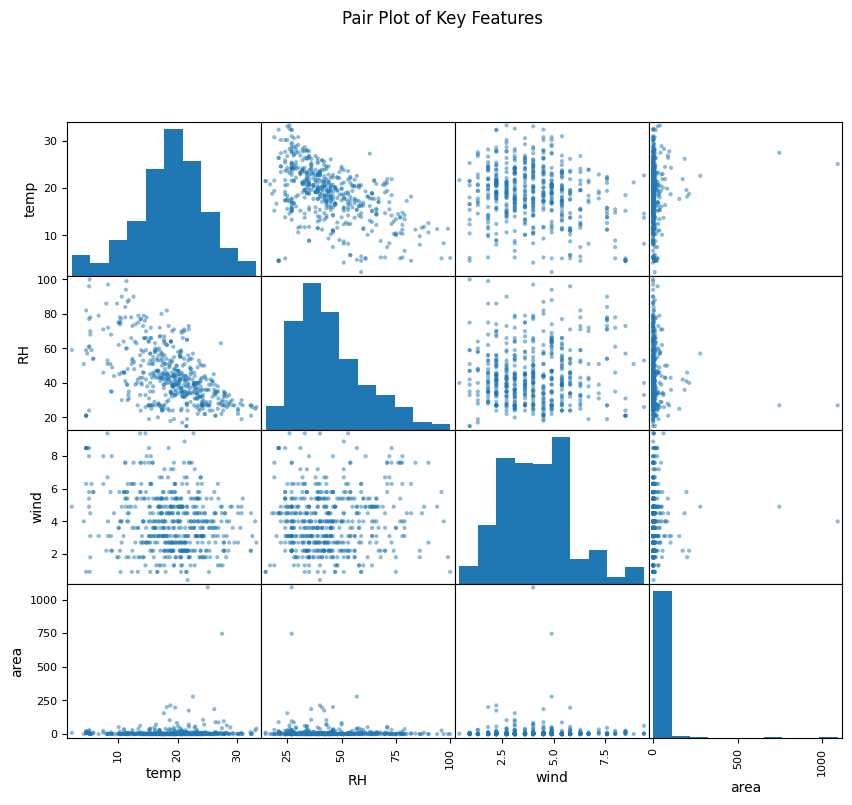

In [13]:
pd.plotting.scatter_matrix(df[['temp', 'RH', 'wind', 'area']], figsize=(10, 8))
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

# Hypothesis Formulation


**Hypothesis 1:** the month of the year has an impact on the occurrence of forest fires

Plot from visualization did not show any clear relations between size of forest fires and certain weather patterns, so I am deciding to go a different route with this hypothesis


**Hypothesis 2:** less rainfall at certain times of year causes a decrease in the spread of forest fires

Plot from visualization did not show any clear relations between size of forest fires and rain amounts, so I figured if rain amounts were totaled at certain times of year, there would be more correlation.

# Hypothesis Testing

**Hypothesis 1**

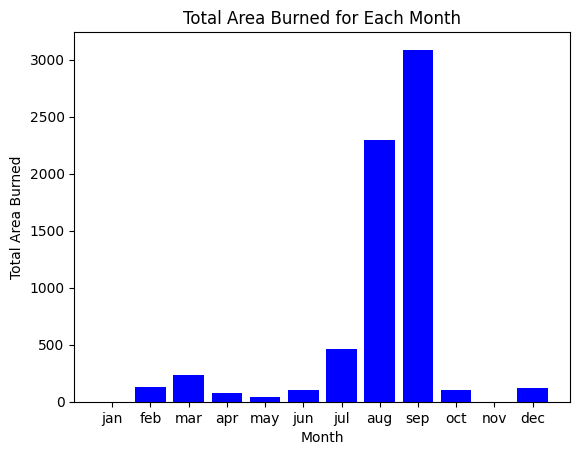

In [11]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)
area_burned_df = df.groupby('month')['area'].sum().reset_index()
area_burned_list = list(area_burned_df.itertuples(index=False, name=None))
months, areas = zip(*area_burned_list)

plt.bar(months, areas, color='blue')
plt.xlabel('Month')
plt.ylabel('Total Area Burned')
plt.title('Total Area Burned for Each Month')
plt.show()

**Hypothesis 2**

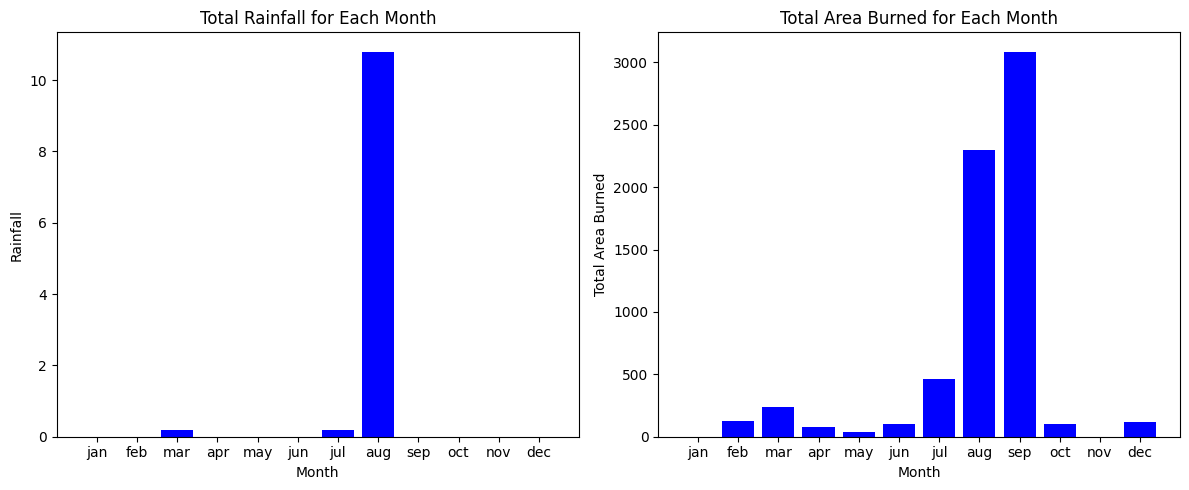

In [33]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)
rainfall_df = df.groupby('month')['rain'].sum().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1 - Total Rainfall
axes[0].bar(rainfall_df['month'], rainfall_df['rain'], color='blue')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Rainfall')
axes[0].set_title('Total Rainfall for Each Month')

# Plot 2 - Total Area Burned
area_burned_df = df.groupby('month')['area'].sum().reset_index()
axes[1].bar(area_burned_df['month'], area_burned_df['area'], color='blue')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Total Area Burned')
axes[1].set_title('Total Area Burned for Each Month')

plt.tight_layout()
plt.show()

# Documentation and Reporting

In my analysis of forest fires in the northeast region of Portugal, I have found that there are certain times of year when forest fires are more likely to occur, but I was unable to determine the factor behind that.

I began with using a scatter plot to compare 4 different columns of my data and go from there to create hypothesis. From this scatter plot I did not gain much information as there was no correlation between area burned and rain, wind, or relative hummidity. Thise are what I initially thought would be affecting the forest fires.

From that I determined that it must be based on time of year and I developed these two hypothesis:
- The month of the year has an impact on the occurrence of forest fires
- The amount of rain at certain times of year causes a decrease in the spread of forest fires

Although the second one contradicts my findings from visualizing the data, I was curious if it hadn't been taking in time of year as well.

Through testing my hypothesis, I found that forest fires are very liekly to occur in August or September, but it has no correlation to rainfall as August is the rainiest month an done would think that more rain = less forest fires.

In conclusion, I need to do much more with this data to come up with a clear output of what is causing the spike in forest fires in August and September.